<a href="https://colab.research.google.com/github/johyunkang/adp_certificate/blob/main/stats_textbook_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6 일반선형모

## 6.1 여러 가지 확률분포

### 6.1.2 이항분포

**이항분포**는 성공확률이 p면서 N회의 독립 베르누이 시행을 했을 때 성공한 횟수 m이 따르는 이산형 확률분포

이항분포는 Binomial distribution의 약자를 취해 Bin으로 표시

- $Bin(m | N, p) = _nC_m \cdot p^m \cdot (1-p)^{N-m}$
- $_NC_m = \dfrac {N!} {(N-m)! \cdot m!}$
- p : 성공확률
- N : 시행횟수
- m : 성공횟수 

### 6.1.5 분석준비 (이항분포)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

%precision 3
%matplotlib inline

### 6.1.6 이항분포(실습)

[2 3 0 1 1]


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


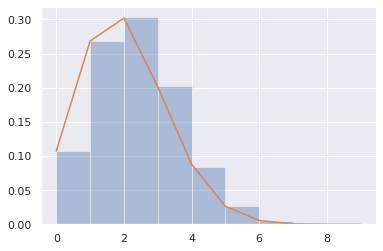

In [2]:
# pmf : Probability Mass Function (확률질량함수)
# 앞이 나올 확률이 50%인 동전을 2번 던져서 그중 1번 앞면이 나올 확률
sp.stats.binom.pmf(k=1, n=2, p=0.5)

np.random.seed(1)

# 난수생성함수 : rvs
# 앞이 나올 확률 20%, 10번 던져 앞이 나온 수를 세는 시행을 5회 반복
print(sp.stats.binom.rvs(n=10, p=0.2, size=5))

# N=10, p=0.2 인 이항분포
binomial = sp.stats.binom(n=10, p=0.2)

# 난수 10,000개
rvs_binomial = binomial.rvs(size=10_000)

# 확률밀도함수
m = np.arange(0, 10, 1)
pmf_binomial = binomial.pmf(k=m)

# 난수의 히스토그램과 확률질량함수를 겹처서 그리기
sns.distplot(rvs_binomial, bins=m, kde=False,
             norm_hist=True)
plt.plot(m, pmf_binomial)


### 6.1.7 푸아송 분포

**푸아송분포**는 1개 또는 2개, 1회 또는 2회 등의 **카운트 데이터**가 따르는 이산형 확률분포입니다.

카운트 데이터는 0 이상의 정수라는 특징이 있음

푸아송 분포의 모수는 **강도**(일이 일어난 횟수에 대한 기댓값, 발생 강도) &lambda; 밖에 없습니다.

푸아송 분포를 따르는 확률변수는 기댓값과 분산도 &lambda; 값과 같습니다.


사용 예
- 낚싯대를 바꾸면 잡아 올리는 물고기 수가 달라지는지
- 주변 환경에 따라 조사 구획내의 생물의 개체수가 변하는지
- 날씨에 따라 상품의 판매 개수가 얼마나 달라지는지

### 6.1.9 푸아송 분포의 확률질량함수

$Pois(x | \lambda) = \dfrac {e^{-\lambda}\lambda^x} {x!}$

- x : 카운트 데이터 등 이산형 확률변수
- &lambda; : 푸아송 분포의 강도

### 6.1.10 이항분포와 푸아송분포의 관계

푸아송 분포는 $p \to 0, N \to \infty $라는 조건에서 이항분포가 $Np = \lambda$ 인 결과라고 볼 수 있음

문장으로 풀어 쓰면 '성공확률이 한없이 0에 가깝지만 시행횟수가 무한히 많은 이항분포' 임

예) 교통사고 사상자수라는 카운트 데이터가 있다고 하면, 사고에 휘말릴 가능성이 있는 사람 수는 길을 걷고 있는 모든 사람 수라는 것이 되므로 `N`은 매우 큰 값이 됨. 한편 사고에 휘말릴 확률 `p`는 매우 작을 것임. 일어나기 어려운 사건 (p -> 0) 이지만 대상이 되는 사람 수가 굉장히 많을 때 (N -> 무한)의 발생건수가 푸아송 분포를 따르는 것이 됨.

### 6.1.11 푸아송 분포 실습

In [3]:
sp.stats.poisson.pmf(k=2, mu=5)

0.08422433748856832

In [7]:
# 강도가 2인 푸아송 분포를 따르는 난수는 다음과 같이 얻을 수 있음
np.random.seed(1)
sp.stats.poisson.rvs(mu=2, size=5)

array([2, 1, 0, 1, 2])

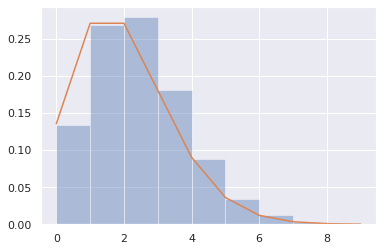

In [9]:
# 람다=2 인 푸아송 분포
poisson = sp.stats.poisson(mu=2)

rvs_poisson = poisson.rvs(size=10_000)

# 확률질량함수
m = np.arange(0, 10, 1)
pmf_poisson = poisson.pmf(k=m)

# 난수의 히스토그램과 확률질량함수 겹쳐 그리기
sns.distplot(rvs_poisson, bins=m, kde=False, norm_hist=True) # 난수의 히스토그램
plt.plot(m, pmf_poisson) # 확률질량함수

푸아송 분포와 이항분포의 관계를 확인하겠음

시행횟수를 100,000,000회, 성공확률을 0.00000002로 한 이항분포의 확률질량함수를 강도 2인 푸아송 분포의 확률질량함수와 비교

이 둘은 거의 일치

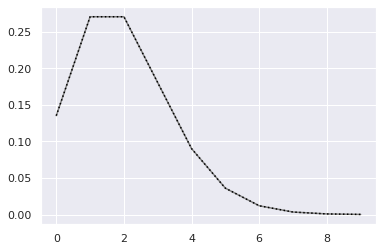

In [22]:
# N이 크고 p가 작은 이항분포
N = 100_000_000
p = 0.000_000_02
m = np.arange(0, 10, 1)

binomial_2 = sp.stats.binom(n=N, p=p)

# 확률질량함수
pmf_binomial_2 = binomial_2.pmf(k=m)

# 확률질량의 그래프
plt.plot(m, pmf_poisson, color='gray')
plt.plot(m, pmf_binomial_2, color='black', linestyle='dotted')

### 6.1.12 그 외의 확률분

`statsmodels`에서 모델링 가능한 확률분포는

- 정규분포
- 이항분포
- 푸아송분포
- 음이항분포 : 푸아송분포와 마찬가지로 카운트 데이터가 따르는 확률분포. 푸아송 보다 분산이 큰것이 특징. 과분산 이슈.
- 감마분포 : 0 이상의 값을 취하는 연속형 확률변수가 따르는 확률분포

## 6.2 일반선형모델의 기본 (GLM; Generalized Linear Models)

### 6.2.1 일반선형모델의 구성요소

- 모집단이 따르는 확률분포
- 선형예측자 : 독립변수를 선형의 관계식으로 표현한 것 (a + b*기온)
- 링크함수 : 종속변수와 선형예측자를 서로 대응시키기 위해 사용. 종속변수에 링크함수를 적용함

### 6.2.5 링크함수와 확률분포의 대응

|  확률분포  | 링크함수 |    모델명     |
| :--------: | :------: | :-----------: |
|  정규분포  | 항등함수 | 정규선형모델  |
|  이항분포  | 로짓함수 | 로지스틱 회귀 |
| 푸아송분포 | 로그함수 |  푸아송 회귀  |


- 항등함수 : f(x) = x 가 되는 함수. 아무런 변환도 하지 않는 함수

### 6.2.7 일반선형모델을 이용한 검정방법

일반선형모델의 검정방법
- Wald 검정 : 샘플사이즈가 클 때 추정값이 정규분포를 따르는 것을 이용한 검정
- 우도비검정 (likelyhood ratio test) : 모델의 적합도를 비교하는 방법
- 스코어 검정 (score test) : 별로 사용되지 않음

## 6.3 로지스틱 회귀

로지스틱 회귀는 확률분포에 이항분포를 사용하고, 링크함수에 로짓함수를 사용한 일반선형모델

독립변수는 여러개 있어도 상관없고, **연속형과 카테고리형이 섞여 있어도 상관없음**

### 6.3.3 로짓함수

**로짓함수**는 아래와 같은 함수

$f(x) = log(\dfrac {x} {1-x})$

### 6.3.4 역함수

f(a) = b 가 있을 때 a, b를 반대로 해서 g(b) = a 가 되는 함수 g(x)를 f(x)의 **역함수** 라고 함

**지수함수의 역함수는 로그함수**

### 6.3.5 로지스틱함수